In [81]:
import numpy as np

#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import random
import pickle
import pandas as pd

import signal
import sys
import time
import math
import csv
import os
import os.path
import argparse
from datetime import datetime
from functools import reduce
from itertools import islice
import seaborn as sns

alpha_default
alpha_norm1 - batch norm 32-64-64-64 (default)
alpha_norm2 - batch norm 32-64-128-64
alpha_layer_norm - layer norm 32-64-128-8
alpha_reversed - 128-64-32
alpha_lr1 - learning rate 0.01 (Default 0.001)
alpha_lr2 - learning rate 0.0001
alpha_opt_sgd

In [113]:
def to_int(line):
    return float(line.split(":")[1].split("\n")[0])

def parse_txt(f, df):
    att_1 = "Current loss"
    att_2 = "Distance Difference"
    att_3 = "Angle Difference"
    att_4 = "Time Taken"
    att_5 = "Total Time"
    with open("Results/"+f, "r") as a_file:
        i = 0
        s = {}
        for line in a_file:
            if i == 0:
                i = 1
            elif att_1 in line:
                s[att_1] = to_int(line)
            elif att_2 in line:
                s[att_2] = to_int(line)
            elif att_3 in line:
                s[att_3] = to_int(line)
            elif att_4 in line:
                s[att_4] = to_int(line)
                try:
                    s[att_5] = s[att_5] + s[att_4]
                except:
                    s[att_5] = s[att_4]
            else:
                s["Type"] = f
                s["Iteration"] = i
                i += 1
                df = df.append(s, ignore_index=True)
    return df
                

In [114]:
df = pd.DataFrame()
for file in os.listdir("Results"):
    if file.startswith("alpha"):
        df = parse_txt(file, df)

In [115]:
df

,Angle Difference,Current loss,Distance Difference,Iteration,Time Taken,Total Time,Type
0,67.240459,67.130157,12.460051,1.0,2945.273149,2945.273149,alpha_norm1.txt
1,79.532320,55.398438,12.030587,2.0,2876.985691,5822.258840,alpha_norm1.txt
2,64.680570,52.435921,14.821503,3.0,2908.959973,8731.218813,alpha_norm1.txt
3,67.079141,48.948906,9.734001,4.0,3007.757647,11738.976460,alpha_norm1.txt
4,63.492678,48.582378,9.988729,5.0,2908.224198,14647.200658,alpha_norm1.txt
...,...,...,...,...,...,...,...
81,60.641513,44.324638,8.499223,8.0,2797.690230,22274.247222,alpha_default.txt
82,61.189833,44.897560,8.607551,9.0,2825.514101,25099.761323,alpha_default.txt
83,61.838784,43.896473,8.690561,10.0,2795.880339,27895.641662,alpha_default.txt
84,58.280064,42.700871,8.668964,11.0,2769.633692,30665.275354,alpha_default.txt


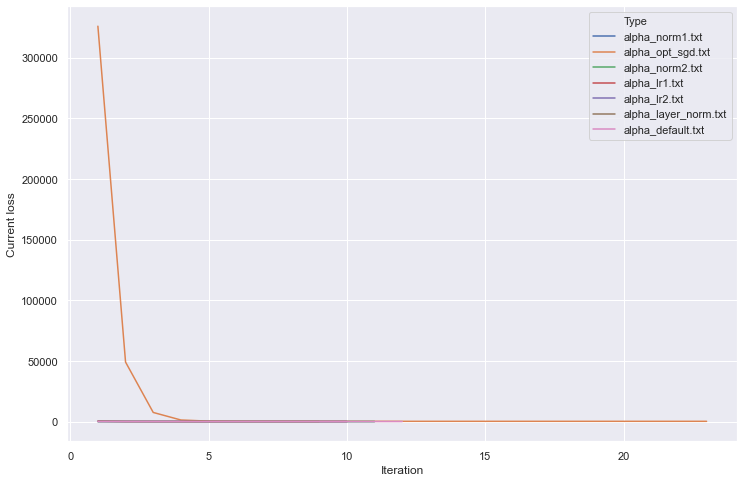

In [116]:
sns.lineplot(data=df, x="Iteration", y="Current loss", hue="Type")

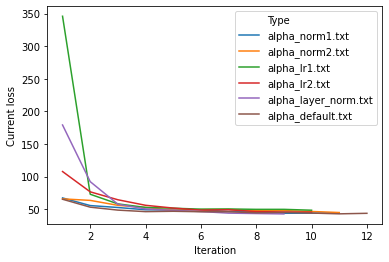

In [87]:
df[df["Type"] != "alpha_opt_sgd.txt"]
sns.lineplot(data=df[df["Type"] != "alpha_opt_sgd.txt"], x="Iteration", y="Current loss", hue="Type")

Loss

/Users/Kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


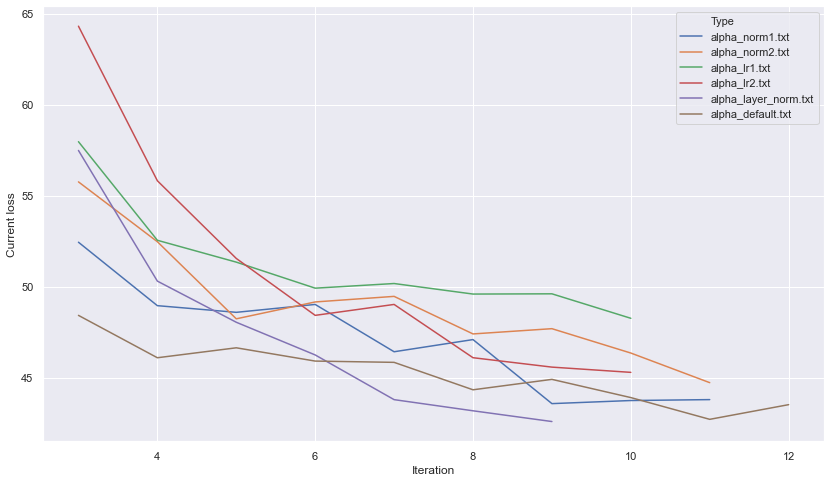

In [104]:
df[df["Iteration"] >= 3]
sns.lineplot(data=df[df["Type"] != "alpha_opt_sgd.txt"][df["Iteration"] >= 3], x="Iteration", y="Current loss", hue="Type")
sns.set(rc={'figure.figsize':(12,8)})

Distance Diff

/Users/Kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


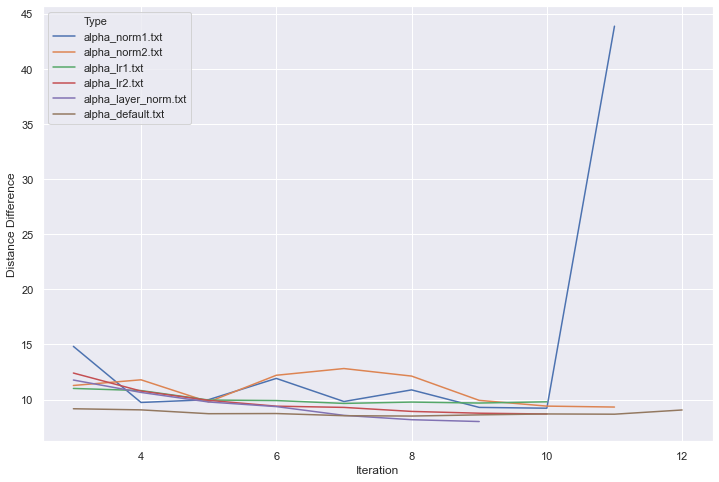

In [105]:
df[df["Iteration"] >= 3]
sns.lineplot(data=df[df["Type"] != "alpha_opt_sgd.txt"][df["Iteration"] >= 3], x="Iteration", y="Distance Difference", hue="Type")
sns.set(rc={'figure.figsize':(12,8)})


Angle Difference

/Users/Kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


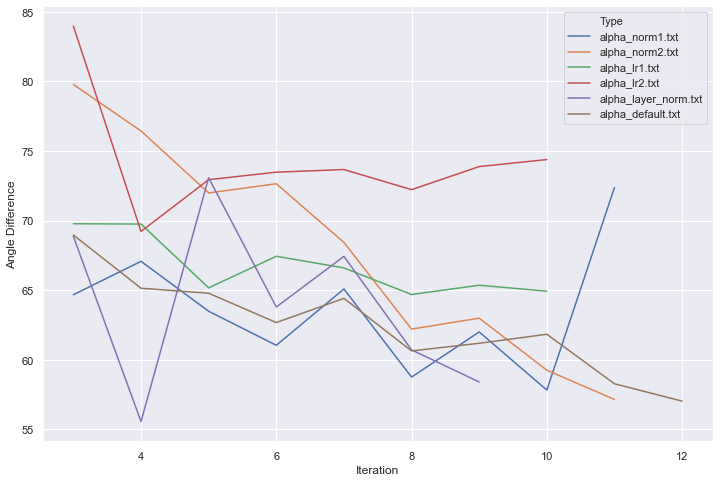

In [106]:
df[df["Iteration"] >= 3]
sns.lineplot(data=df[df["Type"] != "alpha_opt_sgd.txt"][df["Iteration"] >= 3], x="Iteration", y="Angle Difference", hue="Type")
sns.set(rc={'figure.figsize':(12,8)})

Time Taken

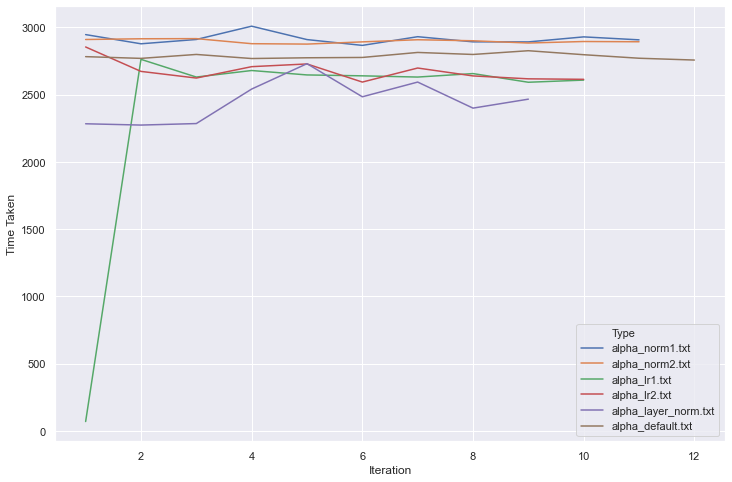

In [108]:
df[df["Iteration"] >= 3]
sns.lineplot(data=df[df["Type"] != "alpha_opt_sgd.txt"], x="Iteration", y="Time Taken", hue="Type")
sns.set(rc={'figure.figsize':(12,8)})

Lineplots by time instead

/Users/Kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


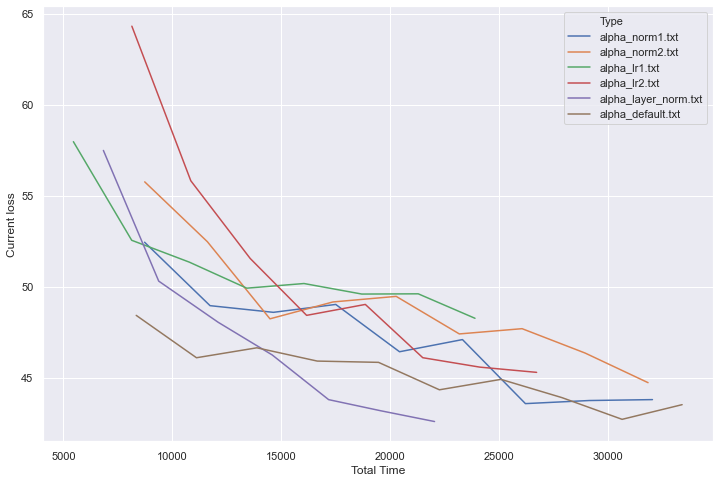

In [117]:
df[df["Iteration"] >= 3]
sns.lineplot(data=df[df["Type"] != "alpha_opt_sgd.txt"][df["Iteration"] >= 3], x="Total Time", y="Current loss", hue="Type")
sns.set(rc={'figure.figsize':(12,8)})

/Users/Kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


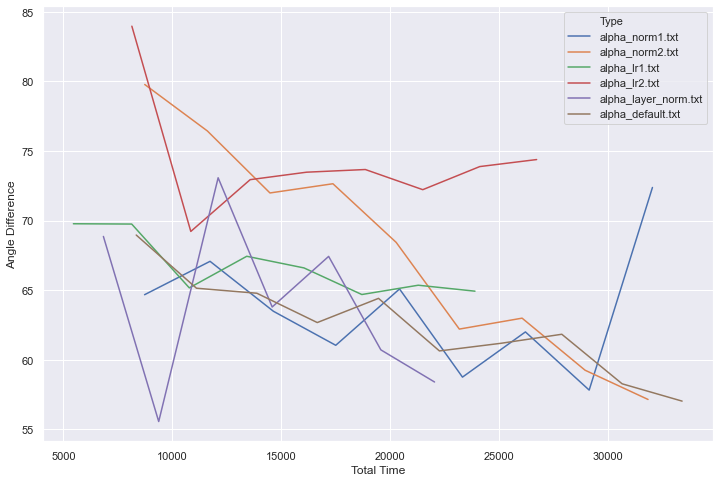

In [119]:
df[df["Iteration"] >= 3]
sns.lineplot(data=df[df["Type"] != "alpha_opt_sgd.txt"][df["Iteration"] >= 3], x="Total Time", y="Angle Difference", hue="Type")
sns.set(rc={'figure.figsize':(12,8)})